# Fakultät für Physik

## Physikalisches Praktikum P2 für Studierende der Physik

Versuch P2-72, 73, 83 (Stand: März 2024)

[Raum F2-19](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P2.png)



# Gammaspektroskopie

Name: Tin Vorname: Vrkic E-Mail: uyvpq@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Name: Nock Vorname: Mika E-Mail: uttzi@stundent.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo32

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: Moritz Puritscher

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 29.04.24

---

**Beanstandungen:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

In [2]:
# importieren aller nötiger Module
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import kafe2
import pathlib

In [3]:
# erstellen einer Funktion für kafe2 Fits
def fit_funktion(xy_data, model_function, xy_error, xy_label, title, constraint=[]):
    xy_data = kafe2.XYContainer(xy_data[0], xy_data[1])
    xy_data.label = title
    fit = kafe2.XYFit(xy_data = xy_data, model_function = model_function)
    fit.add_error(axis = 'x', err_val = xy_error[0])
    fit.add_error(axis = 'y', err_val = xy_error[1])
    for i in range(len(constraint)):
        fit.add_parameter_constraint(name = constraint[i][0], value = constraint[i][1], uncertainty = constraint[i][2])
    fit.do_fit()
    plot = kafe2.Plot(fit)
    plot.x_label, plot.y_label = xy_label[0], xy_label[1]
    
    return fit.parameter_values, fit.parameter_errors, plot

# Durchführung

**Die Anleitung zu diesem Versuch finden Sie [hier](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Gammaspektroskopie/README.md).**

## Aufgabe 1: Messanordnung

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Gammaspektroskopie/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Machen Sie sich mit der Messanordnung vertraut. 
 * Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 1.1: Beschreibung der Messanordnung

 * Beschreiben Sie die Messanordnung, die Sie für diesen Versuch vorfinden in eigenen Worten.

---

Der vorgefundene Aufbau besteht aus einer radioaktiven Quelle, einer Messapparatur, den MCA und einem daran angeschlossenen PC. Die Messapparatur besteht hierbei aus einem Szintillatorkristall, einem Photomultiplier und einem Photodetektor. Die Gammaquanten aus dem Präparat treffen hierbei auf den Kristall und werden dort über Comptonstreuung und den Photeffekt zuerst in Photonen niedrigerer Energie und dann in Elektronen umgewandelt. Im Photomultiplier werden diese Elektronen durch eine Beschleunigungsspannung und mehrere Dynoden vermehrt und dann über einen Widerstand vom MCA gemessen. Außerdem ist eine Spannungsquelle Teil des Experimentes, die die Beschleunigungsspannung liefert und stabilisiert. 


---

### Aufgabe 1.2: Oszilloskopische Untersuchung des Signal 

 * Untersuchen Sie das Signal eines beliebigen radioaktiven Präparats. 
 * Verwenden Sie hierzu den MCA als Oszilloskop. 
 * Beschreiben Sie Ihre Beobachtungen.

---

Die Oszilloskopische Untersuchung eines Signales wurde in diesem Fall mit Co-60 durchgeführt. Die verschiedenen Ereignisse, bei denen ein Gammaquant auf den Szintillator trifft, sind in der Darstellung als verschiedene Ausschläge der Spannung zu erkennen. Außerdem sind diese Ausschläge verschiedene hoch, da sich, wie im Histogramm, für verschiedene Effekte (z.B. Rückstreuung) verschiedene Energien ergeben. 


---

### Aufgabe 1.3: Spektrale Untersuchung des Signal 

 * Untersuchen Sie zur Vorbereitung auf **Aufgabe 2** die Spektren der Präparate $_{\hphantom{0}55}^{137}\mathrm{Cs}$, $_{27}^{60}\mathrm{Co}$ und $_{11}^{22}\mathrm{Na}$.
 * Verwenden Sie hierzu den MCA in seiner eigentlichen Eigenschaft als Spektrumanalysator. 
 * Bestimmen Sie einen einheitlichen dynamischen Bereich, des MCA mit dem Sie alle folgenden Spektren aufzeichnen werden.

---

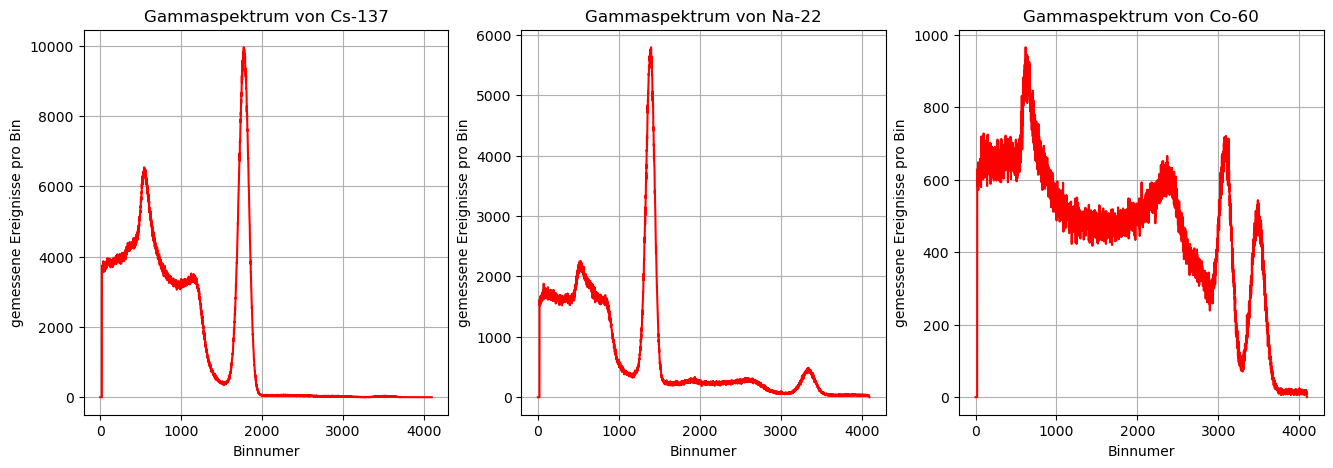

In [4]:
# einlesen der Daten für jedes Element
data_na = pd.read_csv('Messungen/Spektrum_Natrium_10min.csv')
hist_na = np.array(data_na['# mcpha spectrum 20240322-035950'])

data_cs = pd.read_csv('Messungen/Spektrum_Caesium_10min.csv')
hist_cs = np.array(data_cs['# mcpha spectrum 20240322-041100'])

data_co = pd.read_csv('Messungen/Spektrum_Cobalt_10min.csv')
hist_co = np.array(data_co['# mcpha spectrum 20240322-034640'])

# plotten in einer figure
fig_1 = plt.figure(figsize = (16,5))
ax = fig_1.add_subplot(1,3,1)
ay = fig_1.add_subplot(1,3,2)
az = fig_1.add_subplot(1,3,3)

ax.plot(hist_cs,'r')
ay.plot(hist_na,'r')
az.plot(hist_co,'r')

# schön machen des plots
ax.set_title('Gammaspektrum von Cs-137')
ay.set_title('Gammaspektrum von Na-22')
az.set_title('Gammaspektrum von Co-60')

ax.set_xlabel('Binnumer')
ay.set_xlabel('Binnumer')
az.set_xlabel('Binnumer')

ax.set_ylabel('gemessene Ereignisse pro Bin')
ay.set_ylabel('gemessene Ereignisse pro Bin')
az.set_ylabel('gemessene Ereignisse pro Bin')

ax.grid()
ay.grid()
az.grid()

plt.show()

In den oben gezeigten Graphen sind die Gammapspektren von drei radioaktiven Präparaten gezeigt, die mithilfe des oben beschriebenen Aufbaus über $10 min.$ aufgezeichnet wurden. Hierbei sind im Spektrum von Na und Cs jeweils imer die Photopeaks als höchste Erhebungen und daneben die Comptonkante erkennbar ist. bei niedrigeren energien erkennt man das Comptonkontinuum und die Rückstreuungsspitze erkennt. 
Das Spektrum von Cobalt weißt eine Besonderheit auf, da in diesem Atom zwei Gammazerfälle verschiedener Energien stattfinden, die zu zwei Photopeaks und zu zwei, sich überlagernden Restspektren führen. Außerdem ist bei Caesium in den höheren Energien ein zusätzlicher Ausschlag zu sehen, der vermutlich aus dem Betazerfall der Atome stammt. Die Beschleunigungsspannung im Photomultiplier ist in allen Versuchen und den darauf folgenden gleich und beträgt $695V$



---

## Aufgabe 2: Analyse der Impulshöhenspektren

**Hinweise zu Aufgabe 2 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Gammaspektroskopie/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Analysieren Sie die Impulshöhenspektren der Präparate $_{\hphantom{0}55}^{137}\mathrm{Cs}$, $_{27}^{60}\mathrm{Co}$ und $_{11}^{22}\mathrm{Na}$. 
 * Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 2.1: Bestimmung des Untergrunds ohne Präparat

 * Führen Sie eine Messung ohne Präparat durch, um ein Spektrum des Untergrunds zu erhalten, der jeder weiteren Messung unterliegt.
 * Notieren Sie sich die Zeitspanne, in der Sie das Spektrum aufgenommen haben. 

---

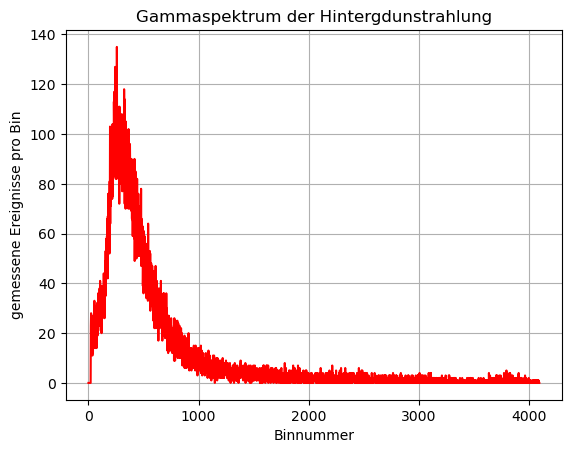

In [8]:
# einlesen der Daten für den Hintergrund
data_bgd = pd.read_csv('Messungen/Untergrund_Hist.csv')
hist_bgd = data_bgd['# mcpha spectrum 20240322-032733']

# plotten des Untergrundes
plt.plot(hist_bgd,'r')

plt.title('Gammaspektrum der Hintergdunstrahlung')
plt.xlabel('Binnummer')
plt.ylabel('gemessene Ereignisse pro Bin')
plt.grid()

plt.show()

Im oben dargestellten Diagramm ist die Aufzeichnung der Hintergrundstrahlung über eine Zeit von $30 min.$ Hierbei ergibt sich nur eine Spitze im eher unteren Energiebereich, die sich eventuell auf kosmische Hintergrundstrahlung zurückführen lässt.


---

### Aufgabe 2.2: Bestimmung der Impulshöhenspektren verschiedener Präparate

 * Führen Sie eine Messung für jedes der oben angegebenen Präparate durch.
 * Notieren Sie sich die Zeitspanne, in der Sie das jeweilge Spektrum aufgenommen haben. 
 * Charakterisieren Sie die Spektren, indem Sie **alle Strukturen**, die Sie darin vorfinden identifizieren.
 * Fügen Sie Darstellungen der Spektren, **wie gemessen**, ins Protokoll ein. Für die anschließende Versuchsauswertung sollten Sie diese Spektren auf den in **Aufgabe 2.1** bestimmten Untergrund korrigieren und die MCA-Kanäle mit Hilfe der in **Aufgabe 2.3** bestimmten Kalibrationkonstanten auf die Energie des Photons $E_{\gamma}$ kalibrieren.

---

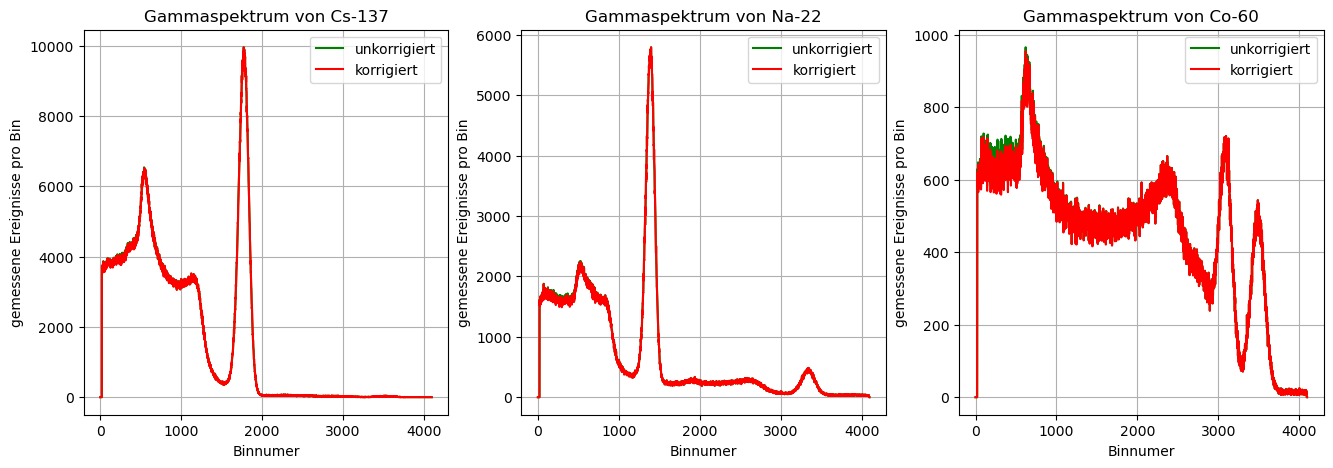

In [9]:
# erstellen der korrigierten Daten 
korr_cs = hist_cs-hist_bgd/3
korr_na = hist_na-hist_bgd/3
korr_co = hist_co-hist_bgd/3

# plotten in einer figure
fig_2 = plt.figure(figsize = (16,5))
ax = fig_2.add_subplot(1,3,1)
ay = fig_2.add_subplot(1,3,2)
az = fig_2.add_subplot(1,3,3)

ax.plot(hist_cs,'g', label='unkorrigiert')
ay.plot(hist_na,'g', label='unkorrigiert')
az.plot(hist_co,'g', label='unkorrigiert')

ax.plot(korr_cs,'r', label='korrigiert')
ay.plot(korr_na,'r', label='korrigiert')
az.plot(korr_co,'r', label='korrigiert')

# schön machen des plots
ax.set_title('Gammaspektrum von Cs-137')
ay.set_title('Gammaspektrum von Na-22')
az.set_title('Gammaspektrum von Co-60')

ax.set_xlabel('Binnumer')
ay.set_xlabel('Binnumer')
az.set_xlabel('Binnumer')

ax.set_ylabel('gemessene Ereignisse pro Bin')
ay.set_ylabel('gemessene Ereignisse pro Bin')
az.set_ylabel('gemessene Ereignisse pro Bin')

ax.grid()
ay.grid()
az.grid()

ax.legend()
ay.legend()
az.legend()

plt.show()

In diesen Diagrammen sind nocheinmal die Spektren der drei Präparate zu sehen, wobei jedoch der Strahlungsuntergrund abgezogen wurde. Die unkorrigierten Graphen sind hinter den eigentlichen in grün zu sehen. Außrdem wuurden die $30min.$ über die der Untergrund gemessen wurde um den Faktor 3 heruntergerechnet, damit sich ein passendes Äquivalent ergibt. 

---

### Aufgabe 2.3: Energie-Kalibration des Detektors

 * Kalibieren Sie mit Hilfe der in **Aufgabe 2.2** aufgezeichneten Spektren die Kanäle des MCA auf die Photonenergie $E_{\gamma}$. 
 * Fügen Sie eine Darstellung der Kalibrationspunkte ins Protokoll ein und passen Sie ein entsprechendes Modell daran an. 

---

In [31]:
# definieren der Funktionen für die Fits
def gaussian_cs(x, mu=1800, sigma = 1, A = 1, baseline = 0):
    return A * np.exp(-(x - mu)**2 / (2 * (sigma**2))) + baseline

def gaussian_na(x, mu=3300, sigma = 1, A = 1, baseline = 0):
    return A * np.exp(-(x - mu)**2 / (2 * (sigma**2))) + baseline

def gaussian_co_low(x, mu=3100, sigma = 1, A = 1, baseline = 0):
    return A * np.exp(-(x - mu)**2 / (2 * (sigma**2))) + baseline

def gaussian_co_high(x, mu=3450, sigma = 1, A = 1, baseline = 0):
    return A * np.exp(-(x - mu)**2 / (2 * (sigma**2))) + baseline

def linear_model(x,m):
    return m*x

    

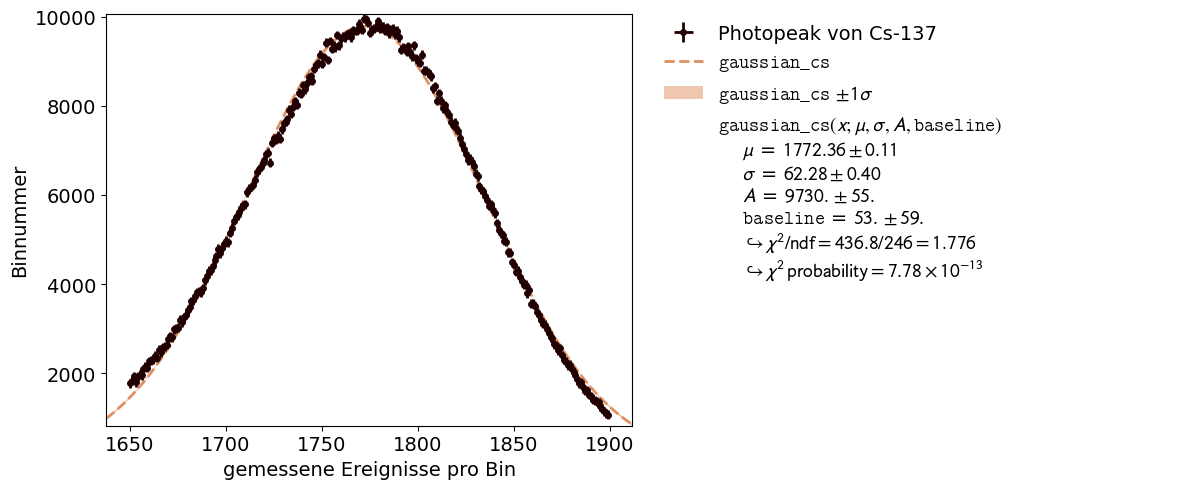

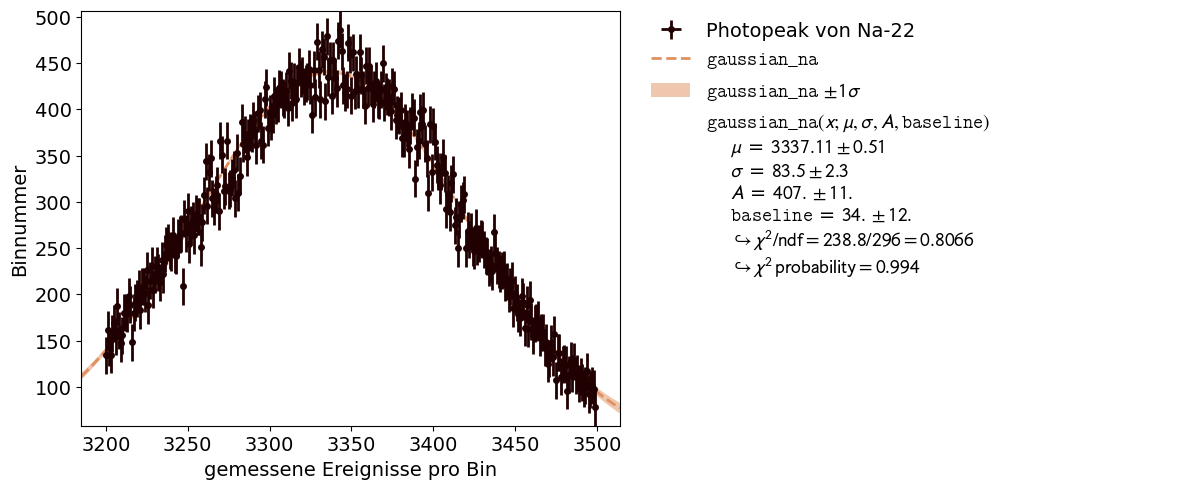

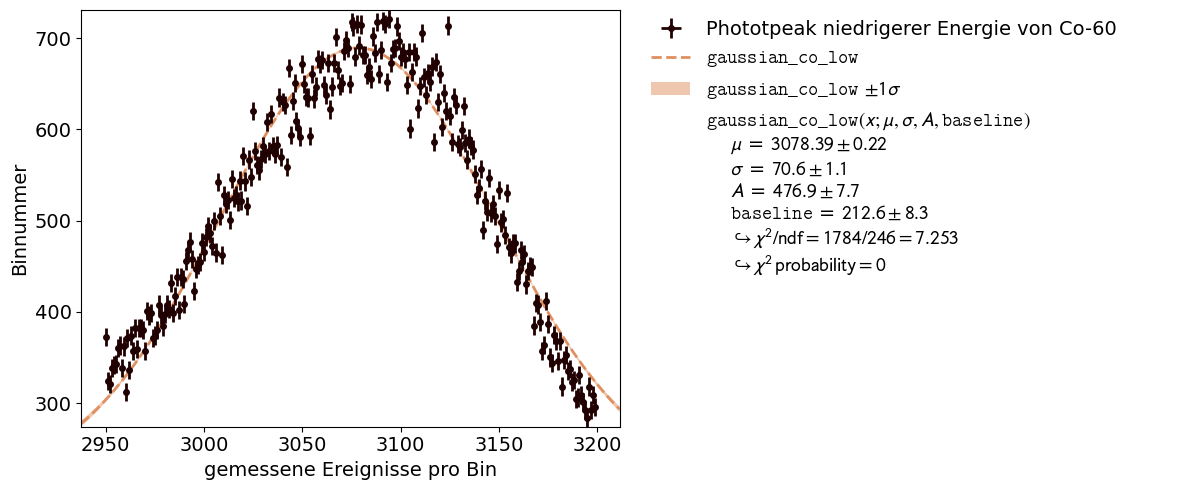

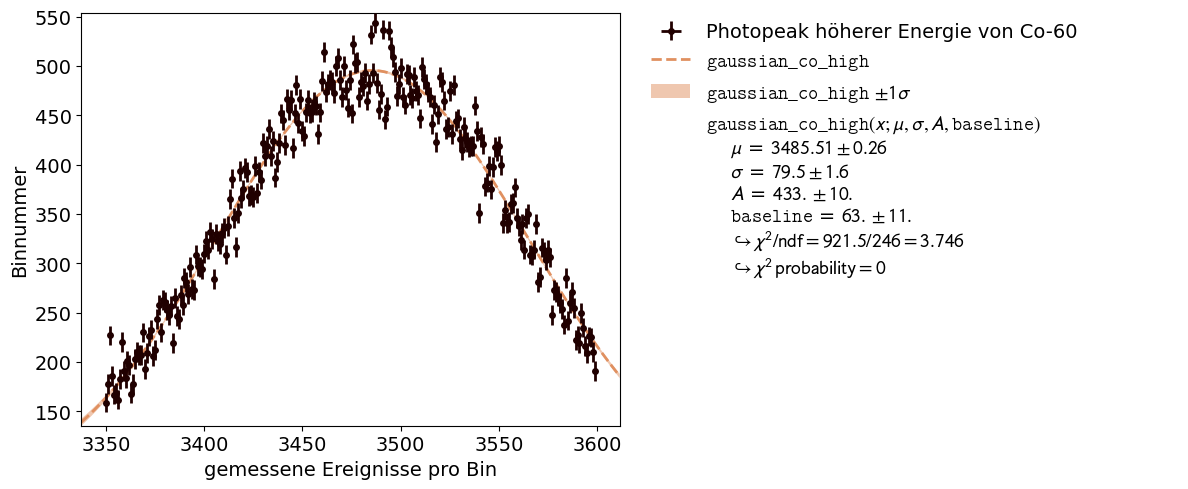

In [32]:
# ausschneiden der Photopeaks aus dem Signal
x = np.arange(4096)

photo_cs = hist_cs[1650:1900]
x_photo_cs = x[1650:1900]

photo_na = hist_na[3200:3500]
x_photo_na = x[3200:3500]

photo_co_low = hist_co[2950:3200]
x_photo_co_low = x[2950:3200]

photo_co_high = hist_co[3350:3600]
x_photo_co_high = x[3350:3600]

# durchführen der fits
fit_photo_cs = fit_funktion((x_photo_cs,photo_cs),gaussian_cs,[1,100], ['gemessene Ereignisse pro Bin','Binnummer'], 'Photopeak von Cs-137') 
fit_photo_na = fit_funktion((x_photo_na,photo_na),gaussian_na,[1,20], ['gemessene Ereignisse pro Bin','Binnummer'], 'Photopeak von Na-22')
fit_photo_co_low = fit_funktion((x_photo_co_low,photo_co_low),gaussian_co_low,[1,10], 
                    ['gemessene Ereignisse pro Bin','Binnummer'], 'Phototpeak niedrigerer Energie von Co-60')
fit_photo_co_high = fit_funktion((x_photo_co_high,photo_co_high),gaussian_co_high,[1,10], 
                    ['gemessene Ereignisse pro Bin','Binnummer'], 'Photopeak höherer Energie von Co-60')

fits = [fit_photo_cs,fit_photo_na,fit_photo_co_low,fit_photo_co_high]

# plotten der Fits
for fit in fits: 
    fit[2].plot()

plt.show()


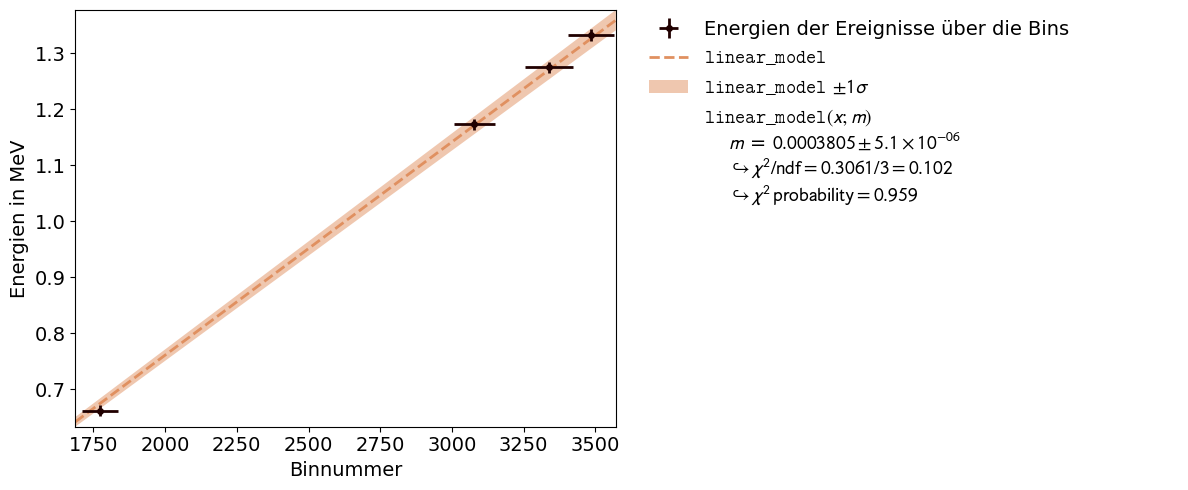

In [43]:
# Bestimmung der Werte aus den fits und ausrechnen der Korrekturfaktors
mu = [fit[0][0] for fit in fits]
std = [fit[0][1] for fit in fits]

ener =  [0.6617,1.2745,1.1732,1.3325] # in MeV

fit_cali = fit_funktion((mu,ener),linear_model,[std,0.01], ['Binnummer','Energien in MeV'], 'Energien der Ereignisse über die Bins')
fit_cali[2].plot()
plt.show()

m = fit_cali[0][0]

In dieser Aufgabe wurden die Photopeaks der Signale aus dem Spektrum ausgeschnitten und dann eine Gaußkurve daran angepasst, sodass man den Erwartungswert und die Standartabweichung des Bins, mit der höchsten Ereignisrate bestimmen kann. Gegen diese Erwartungswerte wird dann die Energie des jeweiligen Ereignisses aufgetragen und daran dann eine Gerade angepasst, sodass man einen Umrechnungsfaktor zwischen den beiden Erhält. 

Da es für die Unsicherheiten der Gausskurven keine wirklichen Angaben gibt und ein Verändern dieser wenig am eigentlichen Ergebnis ausmacht, werden diese in einen Bereich gewählt, in dem sich ein einigermaßen schöner Fit ergibt. Ebenso ist die Angabe der Unsicherheiten der Energien schwierig und wird möglichst niedrig gewählt, da diese sehr genau gemessen wurden. 

Der Umrechnungsfaktor von Binnumer zu Energie beträgt hierbei $m = 0.00033805\pm5.1*10^{-6} MeV$

---

### Aufgabe 2.4: Relative Energie-Auflösung des Detektors

 * Bestimmen Sie mit Hilfe der in **Aufgabe 2.2** aufgezeichneten Spektren die relative Energieauflösung des Detektors als Funktion von $E_{\gamma}$.
 * Fügen Sie eine Darstellung der bestimmten Messpunkte ins Protokoll ein und passen Sie ein entsprechendes Modell daran an. 
 * Schätzen Sie basierend auf dieser Anpassung die erwartete Anzahl ausgeschlagener Elektronen $N_{\mathrm{e}}$ an der Photokathode des im Photodetektor verbauten Photomultipliers ab. 

---

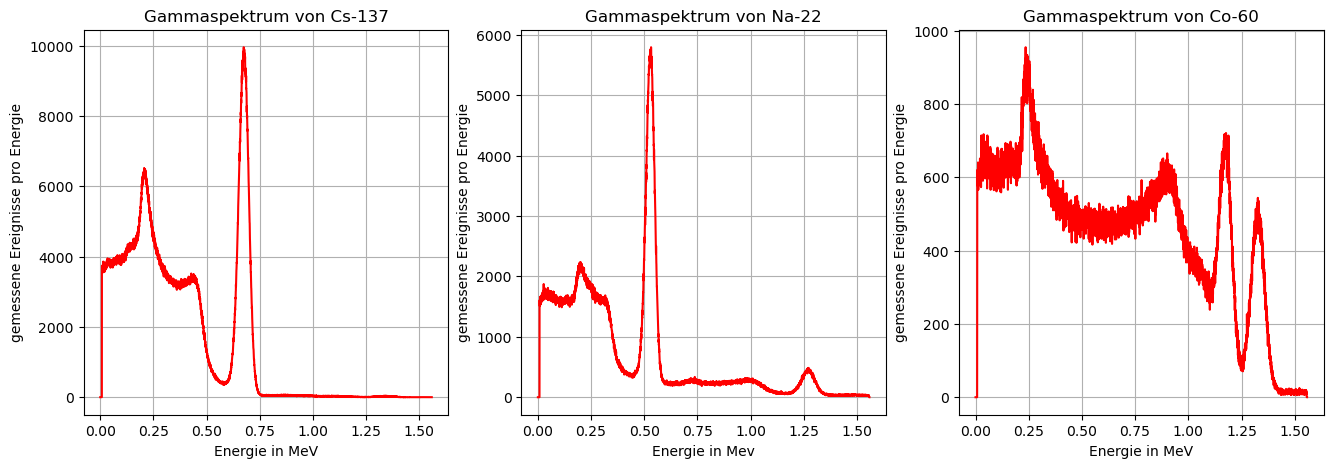

In [40]:
# umrechnenn der x-Achse
x = m * np.arange(4096)

# plotten in einer figure
fig_2 = plt.figure(figsize = (16,5))
ax = fig_2.add_subplot(1,3,1)
ay = fig_2.add_subplot(1,3,2)
az = fig_2.add_subplot(1,3,3)

ax.plot(x,korr_cs,'r')
ay.plot(x,korr_na,'r')
az.plot(x,korr_co,'r')

# schön machen des plots
ax.set_title('Gammaspektrum von Cs-137')
ay.set_title('Gammaspektrum von Na-22')
az.set_title('Gammaspektrum von Co-60')

ax.set_xlabel('Energie in MeV')
ay.set_xlabel('Energie in Mev')
az.set_xlabel('Energie in MeV')

ax.set_ylabel('gemessene Ereignisse pro Energie')
ay.set_ylabel('gemessene Ereignisse pro Energie')
az.set_ylabel('gemessene Ereignisse pro Energie')

ax.grid()
ay.grid()
az.grid()

In den oben gezeigten Graphen ist erneut das Gammaspektrum der drei Präparate zu sehen, jedoch wurde die x-Achse mithilfe des zuvor bestimmten Korrekturfaktors zur Energie in MeV umgerechnet. 


---

## Aufgabe 3: Detektorakzeptanz

**Hinweise zu Aufgabe 3 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Gammaspektroskopie/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Bestimmen Sie Rate aufgezeichneter Photonen für $_{\hphantom{0}55}^{137}\mathrm{Cs}$ bei fünf verschiedenen Abständen des Präparats von der Detektorstirnfläche.  
 * Schätzen Sie ab und begründen Sie, ob eine Korrektur auf den unterliegenden Untergrund notwendig ist. 
 * Schätzen Sie ab und begründen Sie, ob eine Korrektur des Detektors auf pile-up notwendig ist.
 * Fügen Sie eine Darstellung der bestimmten Messpunkte ins Protokoll ein und passen Sie ein entsprechendes Modell daran an. 
 
---

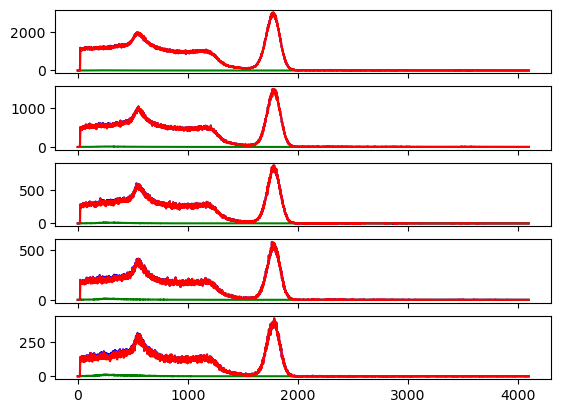

In [5]:
spektrum_cs_0 = pd.read_csv("Messungen/Spektrum_Caesium_3min_0mm.csv")
cs_0 = np.array(spektrum_cs_0["# mcpha spectrum 20240322-041904"])

spektrum_cs_1 = pd.read_csv("Messungen/Spektrum_Caesium_3min_10mm.csv")
cs_1 = np.array(spektrum_cs_1["# mcpha spectrum 20240322-042525"])

spektrum_cs_2 = pd.read_csv("Messungen/Spektrum_Caesium_3min_20mm.csv")
cs_2 = np.array(spektrum_cs_2["# mcpha spectrum 20240322-042911"])

spektrum_cs_3 = pd.read_csv("Messungen/Spektrum_Caesium_3min_30mm.csv")
cs_3 = np.array(spektrum_cs_3["# mcpha spectrum 20240322-043508"])

spektrum_cs_4 = pd.read_csv("Messungen/Spektrum_Caesium_3min_40mm.csv")
cs_4 = np.array(spektrum_cs_4["# mcpha spectrum 20240322-044006"])

untergrund_hist = pd.read_csv("Messungen/Untergrund_Hist.csv")
untergrund = np.array(untergrund_hist["# mcpha spectrum 20240322-032733"]) / 10

fig, ax = plt.subplots(5, sharex=True)
ax[0].plot(cs_0, label="0mm", color="b")
ax[0].plot(untergrund, label="utgrd", color="g")
ax[0].plot(cs_0-untergrund, label="diff", color="r")

ax[1].plot(cs_1, label="10mm", color="b")
ax[1].plot(untergrund, label="utgrd", color="g")
ax[1].plot(cs_1-untergrund, label="diff", color="r")

ax[2].plot(cs_2, label="20mm", color="b")
ax[2].plot(untergrund, label="utgrd", color="g")
ax[2].plot(cs_2-untergrund, label="diff", color="r")

ax[3].plot(cs_3, label="30mm", color="b")
ax[3].plot(untergrund, label="utgrd", color="g")
ax[3].plot(cs_3-untergrund, label="diff", color="r")

ax[4].plot(cs_4, label="40mm", color="b")
ax[4].plot(untergrund, label="utgrd", color="g")
ax[4].plot(cs_4-untergrund, label="diff", color="r")

In obigem Plot ist jeweils in blau das für 5 verschiedene Abstände des Präparats vom Detektor aufgenommene Spektrum, in grün der einmal aufgenommene Hintergrund und in rot schließlich das auf den Untegrund korrigierte Spektrum zu sehen. Da der Untergrund $30\,min$ lang, die Spektren aber jeweils nur $3\,min$ lang aufgenommen wurden, wurden die Werte des Untergrunds durch $10$ geteilt.  

Laut der Vorbereitung kann der Effekt von pile-up dadurch abgeschätzt werden, dass man die auf den Untergrund korrigierte Anzahl an Einträgen rechts des Photopeaks zählt. Da der Untergrund aber nur für den unteren Bin-Bereich (etwa die ersten $1000$ Bins), also für niedrige Energien, eine Rolle spielt und selbst dort nur wenig Auswirkungen hat, kann der Effekt von pile-up vernachlässigt werden. Man sieht nämlich, dass sich das korrigierte Spektrum mit dem ursprünglichen deckt. Ob man die Anzahl an Einträgen aber irgendwie im Fit verarbeiten soll, dazu stand in der Vorbereitung nichts konkretes, und da der Effekt sowieso vernachlässigbar ist, wurde er im Fit nicht berücksichtigt.

In [15]:

# Caesium in 5 verschiedenen Abständen 
# Abstand in m
d = np.array([0.0, 10.0, 20.5, 30.0, 40.0]) * 10**(-3)
# Unsicherheit auf die Ablesung des Abstandes in m
d_std = 1.5*10**(-4)
# Durchschnittliche Rate in 1/s
avg_rate = np.array([11.3, 5.33, 2.96, 1.99, 1.41]) * 10**3

In [16]:
# Modell-Funktion für Detektorakzeptanz
def akzeptanz(d, c=1, abst_präp=20*10**(-3), utgrd=30):
    return c * 1/((d+abst_präp)**2) + utgrd + 26.6

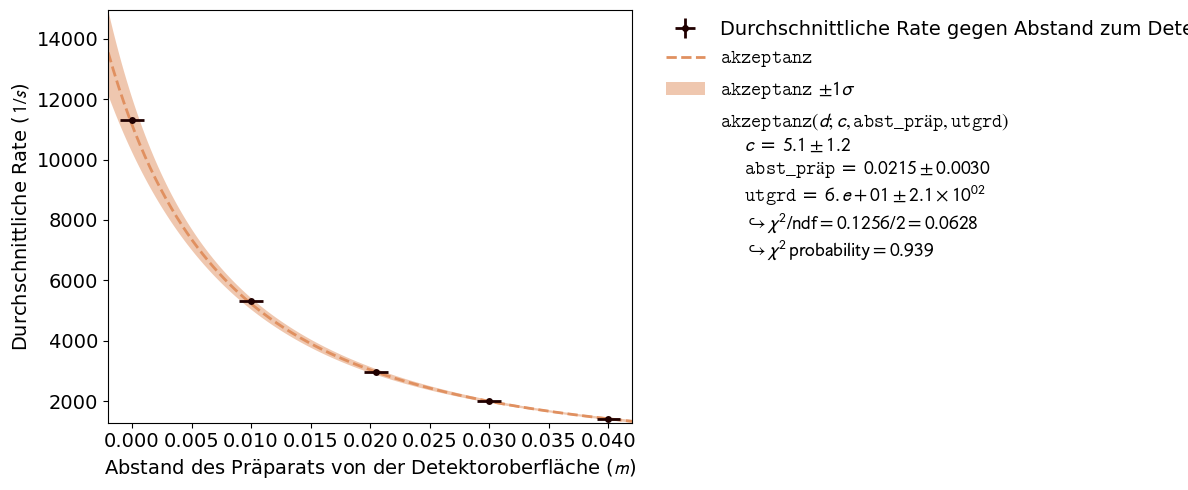

In [17]:
akzeptanz_data = np.array([d, avg_rate])
akzeptanz_error = np.array([d_std, 1])
akzeptanz_label = [ f"Abstand des Präparats von der Detektoroberfläche ($m$)" , f"Durchschnittliche Rate ($\,1/s$)" ]
akzeptanz_title = "Durchschnittliche Rate gegen Abstand zum Detektor"

values, errors, plot = fit_funktion(akzeptanz_data, akzeptanz, akzeptanz_error, akzeptanz_label, akzeptanz_title)
plot.plot()
plot.show()

Eine Korrektur auf den unterliegenden Untergrund wurde in Form einer konstanten Rate vorgenommen, da das Präparat bis zu $5\,cm$ vom Detektor entfernt war und daher der Untergrund eine nicht zu verachtende Rolle spielen wird.  

Man erhält aus dem Fit also die folgende Funktion für die Detektor Akzeptanz:  
$$A(d)=c_1 \cdot \frac{1}{(d+c_2)^2}+c_3=5.07\frac{\,m^2}{\,s} \cdot \frac{1}{(d+0.02116\,m)^2}+54\,\frac{1}{\,s}$$   
wobei $c_1=(5.07\pm0.19)\frac{\,m^2}{s}$, $c_2=(2.116\pm0.047)\,cm$ und $c_3=(54\pm33)\,\frac{1}{\,s}$  

Da in der Vorbereitung nichts weiter zur Detektorakzeptanz stand, bis auf die Proportionalität $A\propto 1/d^2$, wurde im Fit die Durchschnittliche Rate gegen den Abstand aufgetragen und dementsprechend angenommen, dass die Akzeptanz die Einheit $1/s$ hat.


---